In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
traindf = pd.read_csv("F:\Courses\Complete Guide to TensorFlow for Deep Learning with Python\Complete Guide to TensorFlow for Deep Learning with Python\Tensorflow-Bootcamp-master\My Other Notebooks\Titanic Dataset/train.csv")
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
traindf.info()
traindf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
#Visualizing Dataset
#Checking for Null values
#sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis',yticklabels=False)
#Counting how many survived
#sns.countplot(x='Survived',data=traindf)
#Counting how many survived gender wise
#sns.countplot(x='Survived',data=traindf,hue='Sex')
#Counting how many survived PClass wise
#sns.countplot(x='Survived',data=traindf,hue='Pclass')
#Seeing age of Person on titanic and not involving null values to corrupt our graph
#sns.distplot(traindf['Age'].dropna(),kde=False)
#Let seee how many people had spouse
#sns.countplot(x='SibSp',data=traindf)
#Let see fare 
#sns.distplot(traindf['Fare'],kde=False)

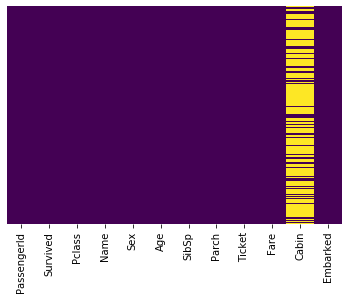

In [59]:
'''Now we know that Age has Nan values so let do something about it.
Either we can give mean value of age to every nan value or
we can do something more good,specific and see it accordinf to class wise.'''
#sns.boxplot(x='Pclass',y='Age',data=traindf) #To see mean age value of different class
def computeAge(col):
    Age = col[0]
    Class = col[1]
    if pd.isnull(Age):
        if Class == 1:
            return 37
        elif Class ==2:
            return 30
        elif Class ==3:
            return 23
    else:
        return Age
    
traindf['Age'] = traindf[['Age','Pclass']].apply(computeAge,axis=1)
sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis',yticklabels=False) #For checking if done correctly


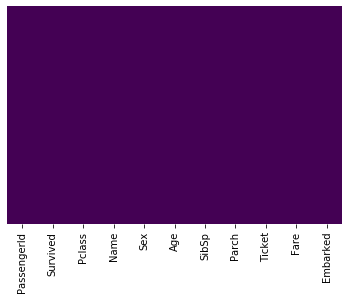

In [60]:
'''Now for Cabin column , it has so missing data we cant do anything about it. So drop it'''
traindf.drop(labels='Cabin',axis=1,inplace=True)
sns.heatmap(traindf.isnull(),cbar=False,cmap='viridis',yticklabels=False) #For checking if done correctly

In [61]:
'''Now after cleaning lets move toward which columns to use and which not. We can put categorical data 
so we will make dummy values out of it'''
sex = pd.get_dummies(traindf['Sex'],drop_first=True)
embark = pd.get_dummies(traindf['Embarked'],drop_first=True)
traindf = pd.concat([traindf,sex,embark],axis=1)
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [62]:
'''Now drop columns which you dont need'''
traindf.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [63]:
'''Now Lets Separate Test and train data''' 
X_Data = traindf.drop('Survived',axis=1)
Y_Data = traindf['Survived']

In [64]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_Data,Y_Data,test_size=0.30,random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()

In [66]:
Model.fit(X_train,y_train)

C:\Users\Cheema\.conda\envs\tfdeeplearning1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions = Model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[134  20]
 [ 38  76]]
